IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor


EDA

In [2]:
df = pd.read_csv(r"C:\Users\Swagatika Samal\Desktop\documents\DATA IS GOOD\Unmessenger\Machine Learning\Car Dataset.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
df.describe(include=np.number)

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [6]:
df.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,4340,4340,4340,4340,4340
unique,1491,5,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,69,2153,3244,3892,2832


In [7]:
df.shape

(4340, 8)

In [8]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [9]:
car_cat=df.select_dtypes(include = 'object')
car_num=df.select_dtypes(include = np.number)
print('Continuous variables are : ',car_num.columns)
print('Categorical Columns are : ',car_cat.columns)

Continuous variables are :  Index(['year', 'selling_price', 'km_driven'], dtype='object')
Categorical Columns are :  Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')


In [10]:
car_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   year           4340 non-null   int64
 1   selling_price  4340 non-null   int64
 2   km_driven      4340 non-null   int64
dtypes: int64(3)
memory usage: 101.8 KB


In [11]:
print('% Values in each categorical columns')
for i in car_cat.columns:
    print('\n% Values in column ',i)
    print((df[i].value_counts(1)))

% Values in each categorical columns

% Values in column  name
name
Maruti Swift Dzire VDI                     0.015899
Maruti Alto 800 LXI                        0.013594
Maruti Alto LXi                            0.010829
Maruti Alto LX                             0.008065
Hyundai EON Era Plus                       0.008065
                                             ...   
Hyundai Verna Transform CRDi VGT SX ABS    0.000230
Maruti S-Presso VXI Plus                   0.000230
Toyota Etios Liva 1.2 VX                   0.000230
Toyota Yaris G                             0.000230
Hyundai i20 Magna 1.4 CRDi                 0.000230
Name: proportion, Length: 1491, dtype: float64

% Values in column  fuel
fuel
Diesel      0.496083
Petrol      0.489171
CNG         0.009217
LPG         0.005300
Electric    0.000230
Name: proportion, dtype: float64

% Values in column  seller_type
seller_type
Individual          0.747465
Dealer              0.229032
Trustmark Dealer    0.023502
Name: propor

In [12]:
car_num.head()


,year,selling_price,km_driven
0,2007,60000,70000
1,2007,135000,50000
2,2012,600000,100000
3,2017,250000,46000
4,2014,450000,141000


In [13]:
df["name"].value_counts()

name
Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: count, Length: 1491, dtype: int64

In [14]:
make_df = df["name"].str.split(" ", expand = True)

In [15]:
df["manufacturer"] = make_df[0]

In [16]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,manufacturer
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [17]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
manufacturer     0
dtype: int64

DISTRIBUTION OF VARIABLES

<Axes: >

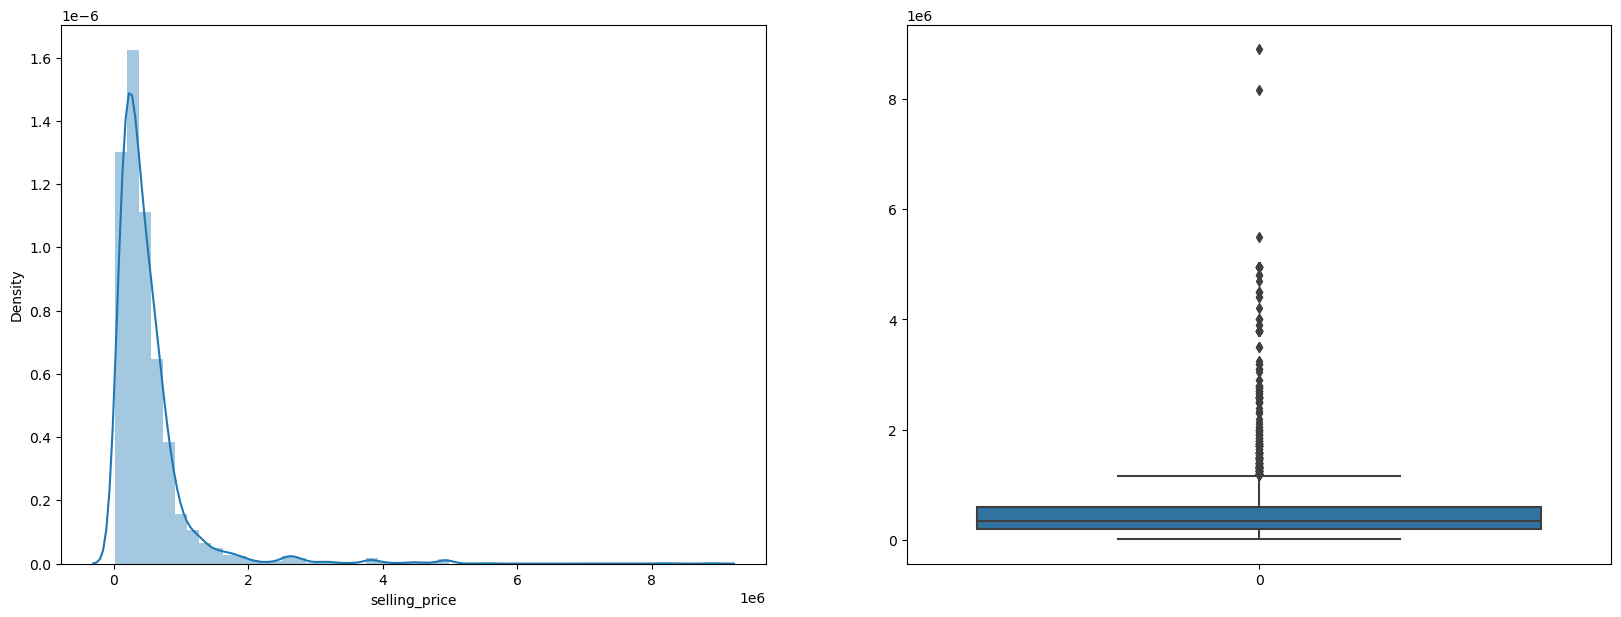

In [18]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.distplot(df['selling_price'])

plt.subplot(1,2,2)
sns.boxplot(df['selling_price'])


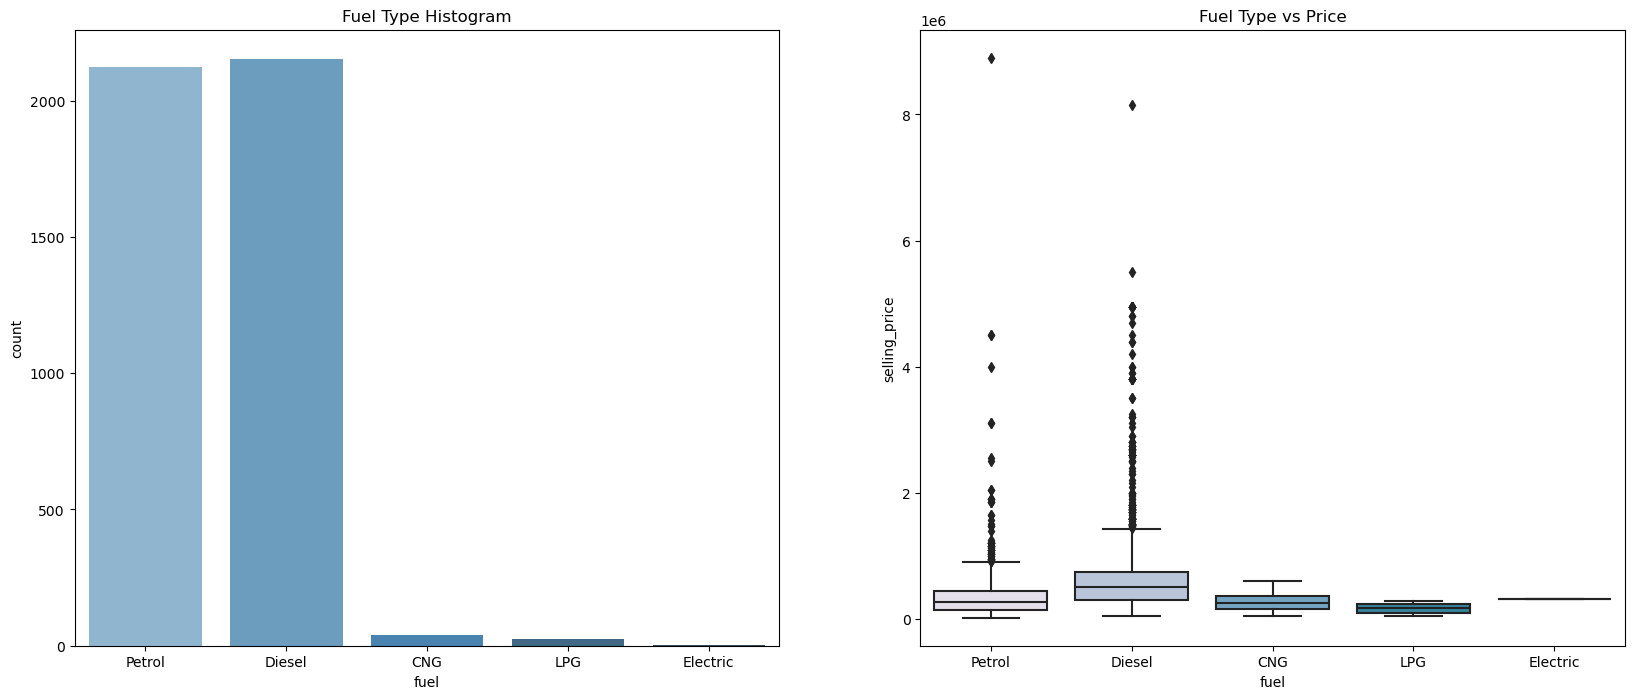

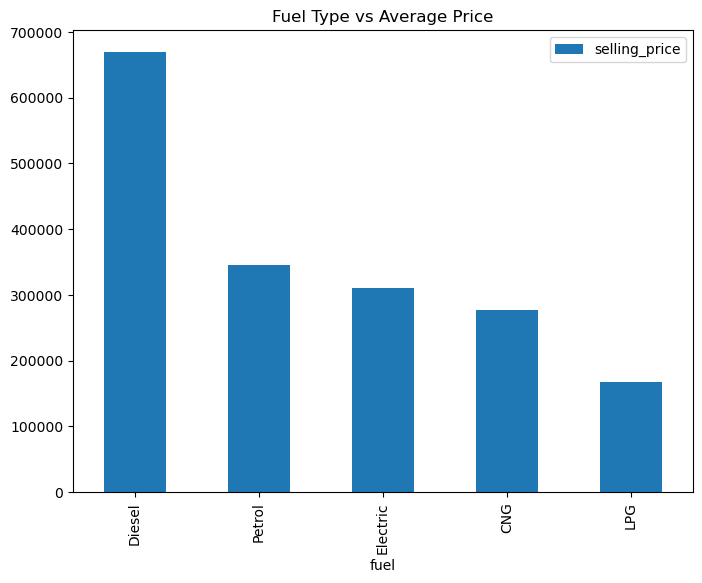

In [19]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Fuel Type Histogram')
sns.countplot(df, x="fuel", palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Fuel Type vs Price')
sns.boxplot(x=df['fuel'], y=df['selling_price'], palette=("PuBuGn"))

plt.show()

df1 = pd.DataFrame(df.groupby(['fuel'])['selling_price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('Fuel Type vs Average Price')
plt.show()

In [20]:
#Number of petrol and diesel fueled cars are more than any other fueled car.
#Average selling price of Diesel cars is comparitively more than any other car.

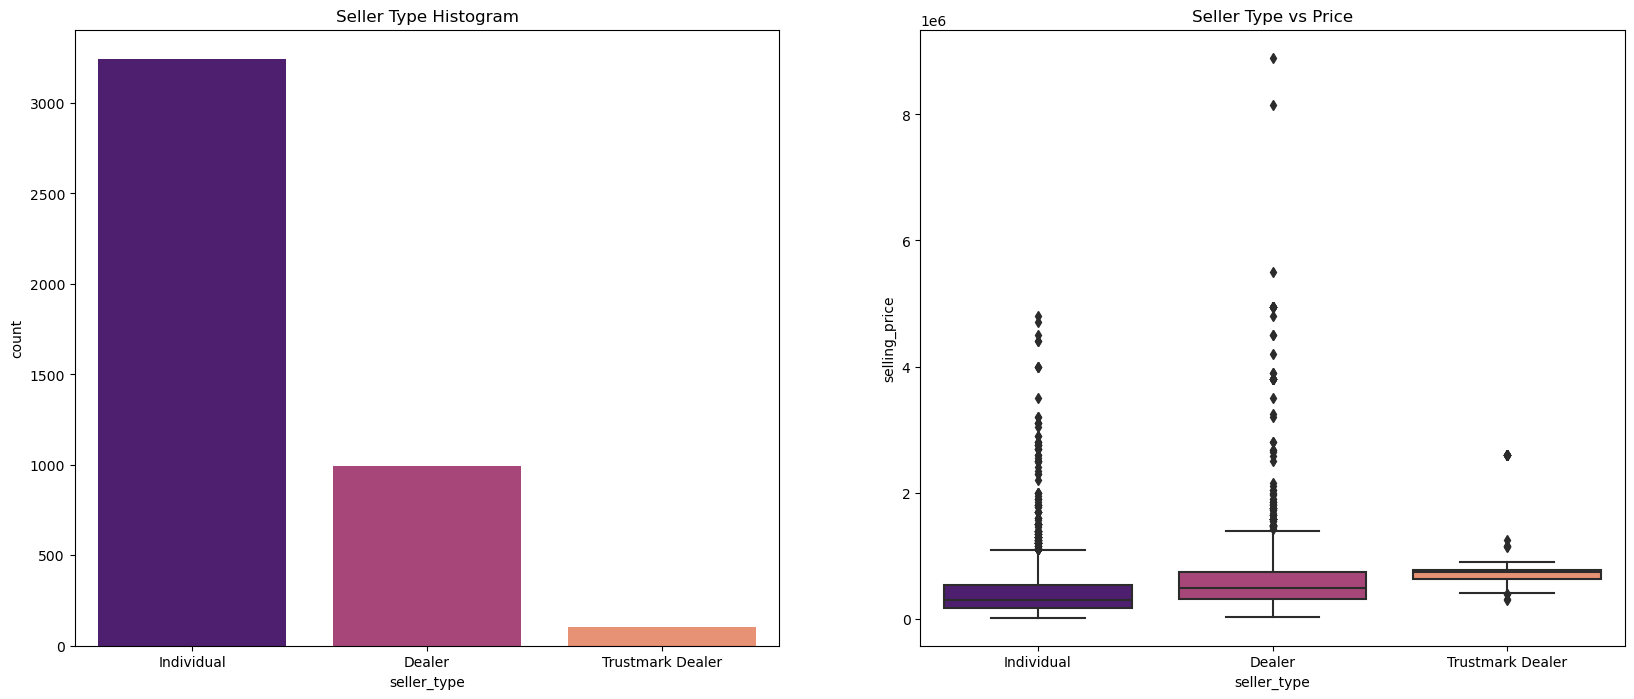

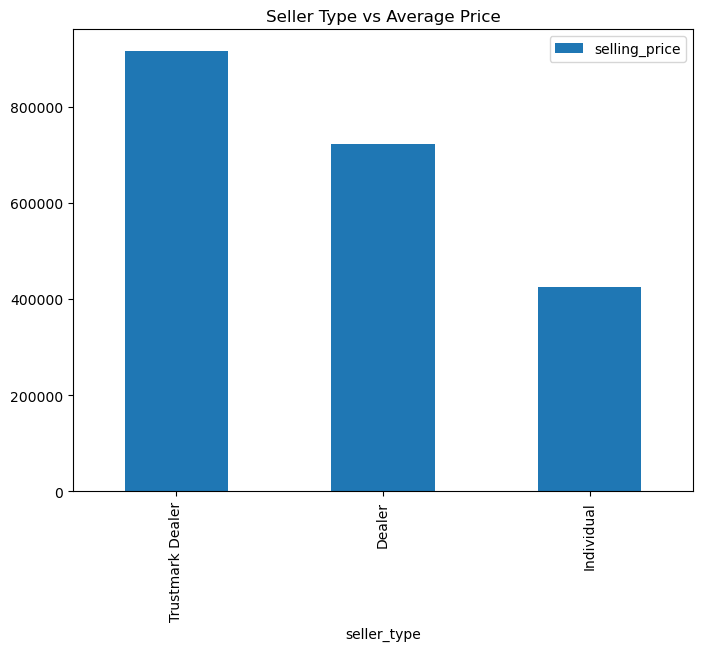

In [21]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Seller Type Histogram')
sns.countplot(df, x="seller_type", palette=("magma"))

plt.subplot(1,2,2)
plt.title('Seller Type vs Price')
sns.boxplot(x=df['seller_type'], y=df['selling_price'], palette=("magma"))

plt.show()

df3 = pd.DataFrame(df.groupby(['seller_type'])['selling_price'].mean().sort_values(ascending = False))
df3.plot.bar(figsize=(8,6))
plt.title('Seller Type vs Average Price')
plt.show()

In [22]:
# Individuals sell their car more easily
#But Avearage Price of car goes up as a seller sells through Trustmark Dealer

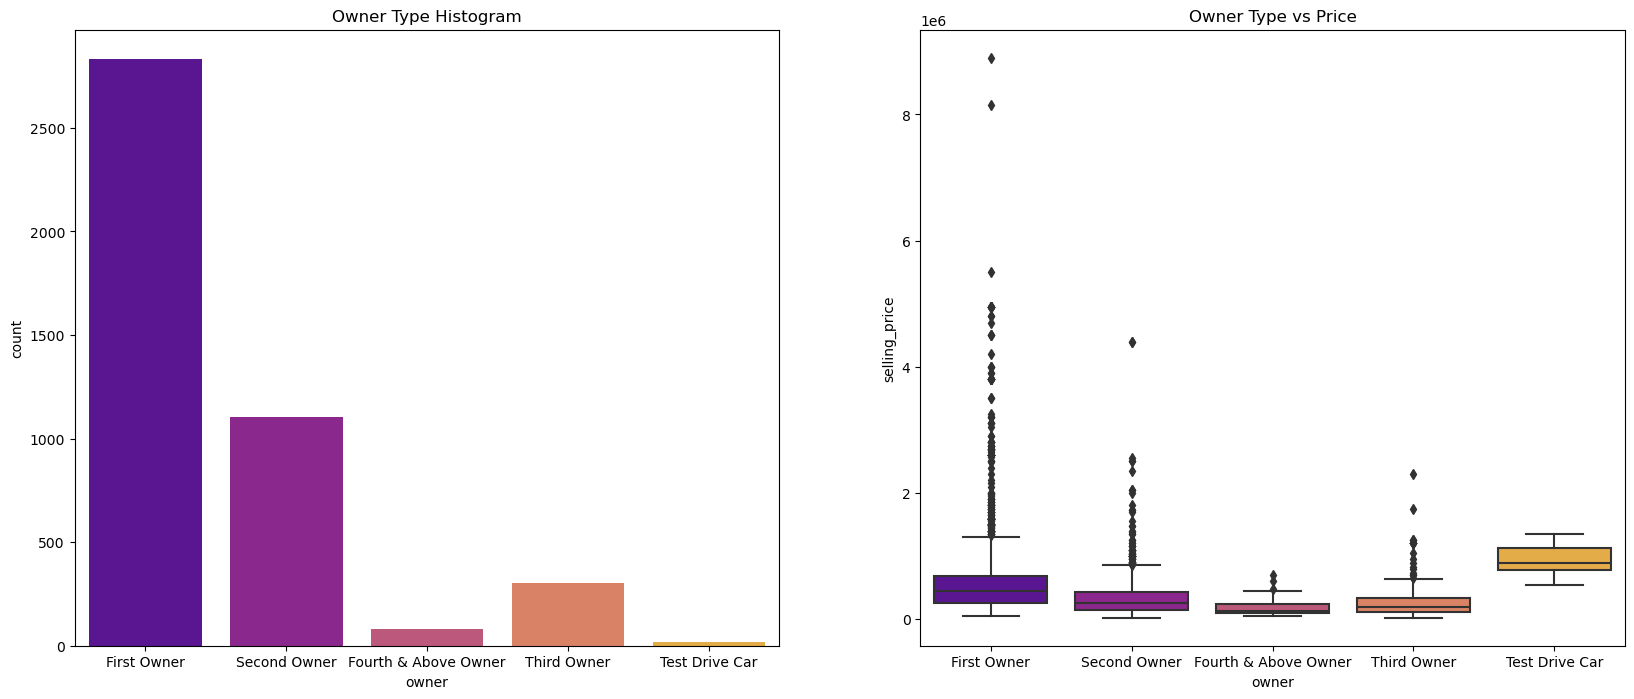

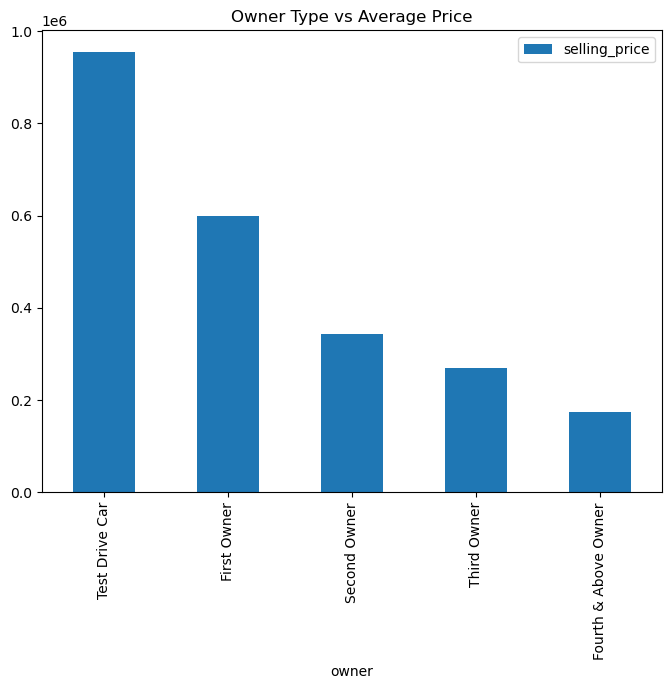

In [23]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Owner Type Histogram')
sns.countplot(df, x="owner", palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Owner Type vs Price')
sns.boxplot(x=df['owner'], y=df['selling_price'], palette=("plasma"))

plt.show()

df4 = pd.DataFrame(df.groupby(['owner'])['selling_price'].mean().sort_values(ascending = False))
df4.plot.bar(figsize=(8,6))
plt.title('Owner Type vs Average Price')
plt.show()

In [24]:
# People love to buy new car rather than used cars
#But the avearage selling price of Test Drive cars is more

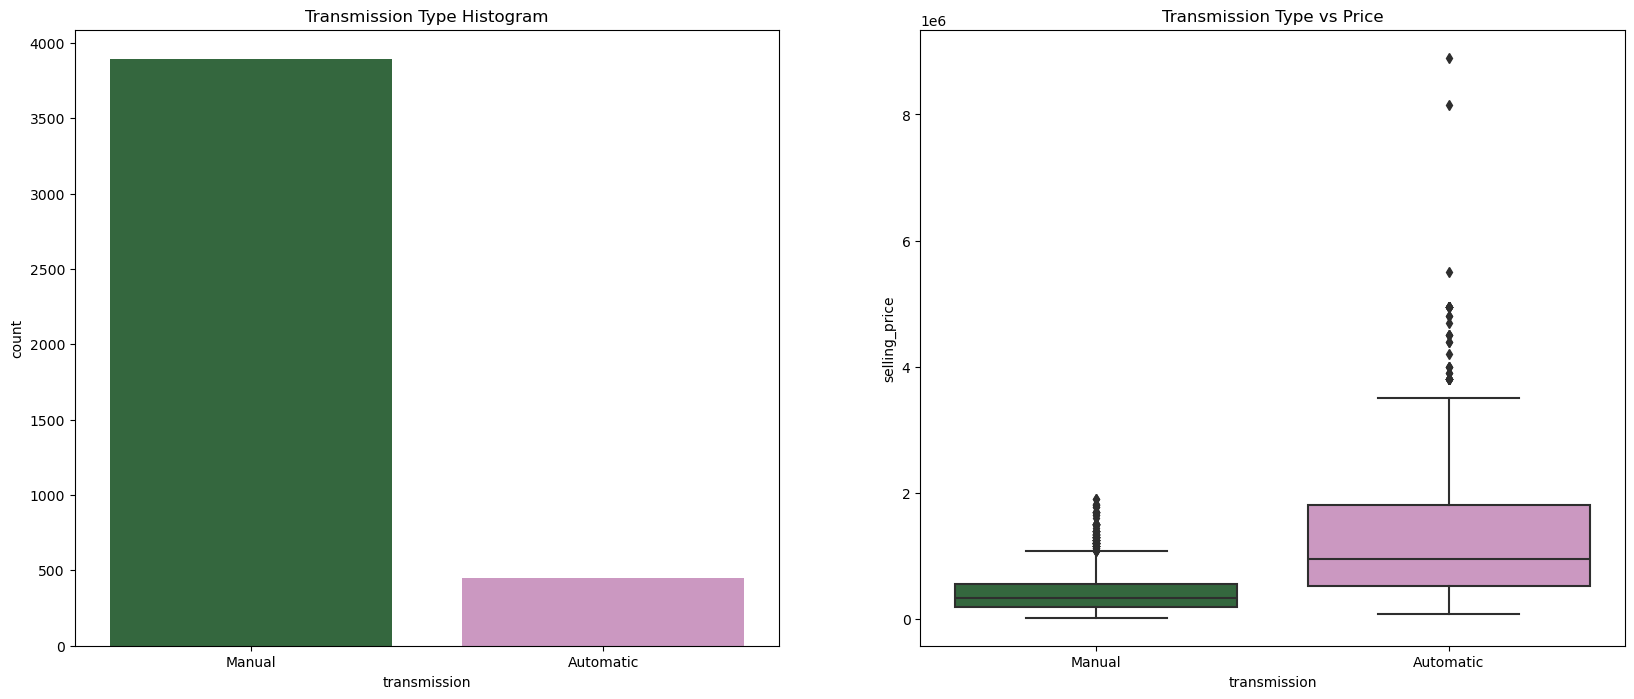

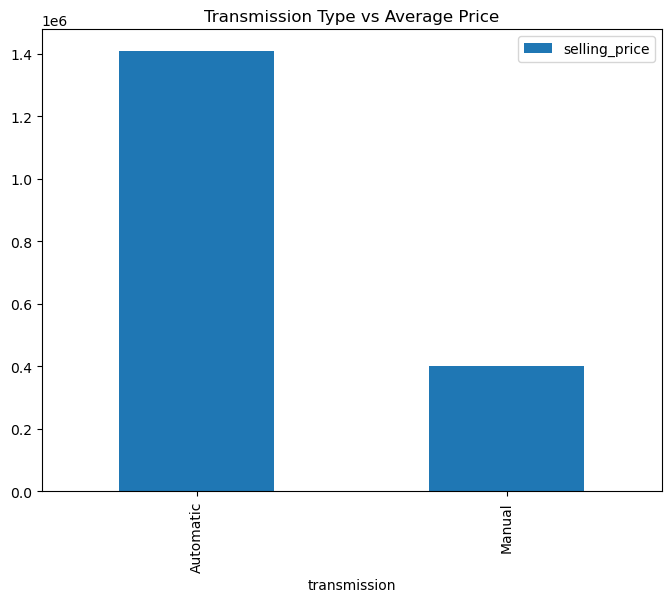

In [25]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Transmission Type Histogram')
sns.countplot(df, x="transmission", palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Transmission Type vs Price')
sns.boxplot(x=df['transmission'], y=df['selling_price'], palette=("cubehelix"))

plt.show()

df5 = pd.DataFrame(df.groupby(['transmission'])['selling_price'].mean().sort_values(ascending = False))
df5.plot.bar(figsize=(8,6))
plt.title('Transmission Type vs Average Price')
plt.show()

In [26]:
#People prefer to buy manually driven cars
#But average selling price of Automatic cars is more than Manual

Text(0, 0.5, 'Count of cars')

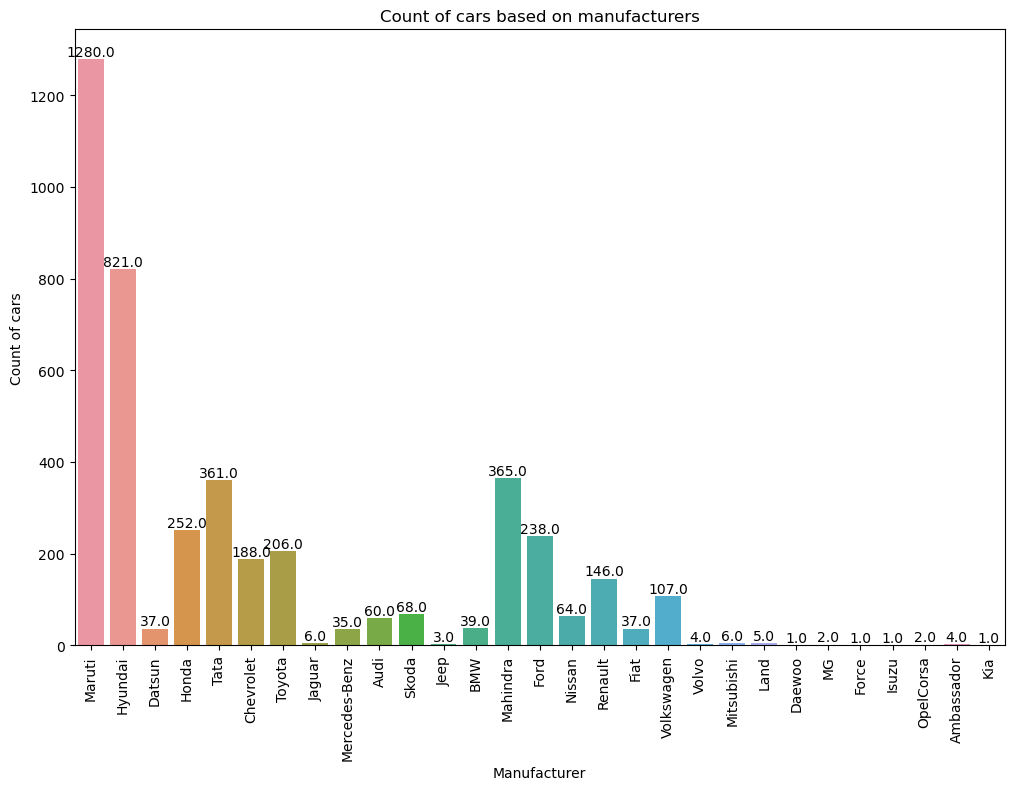

In [27]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'manufacturer', data = df)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

In [28]:
#People mostly prefer Maruti and Hyundai Cars

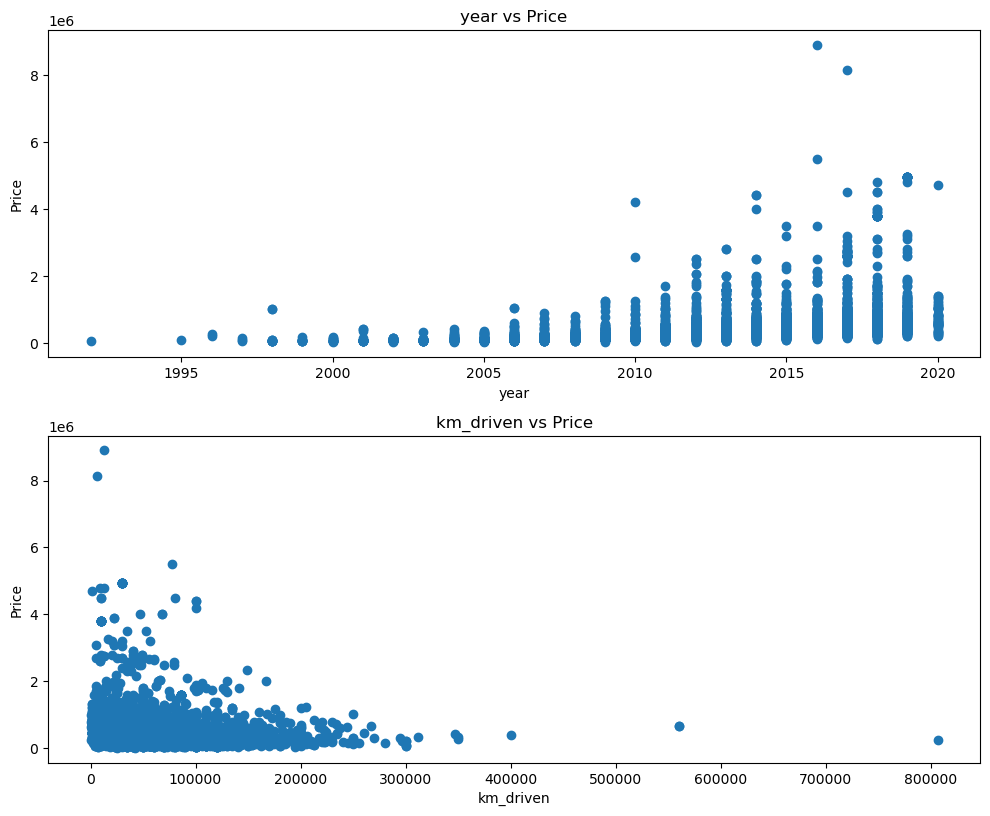

In [29]:
#visualization of numerical variables w.r.t selling price(target variable)
def scatter(x,fig):
    plt.subplot(5,1,fig)
    plt.scatter(df[x],df['selling_price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('year', 1)
scatter('km_driven', 2)


plt.tight_layout()


In [30]:
# Increasing price trend of the cars over the years

OUTLIERS AND ITS TREATMENT

In [31]:
#BEFORE OUTLIER
df.shape

(4340, 9)

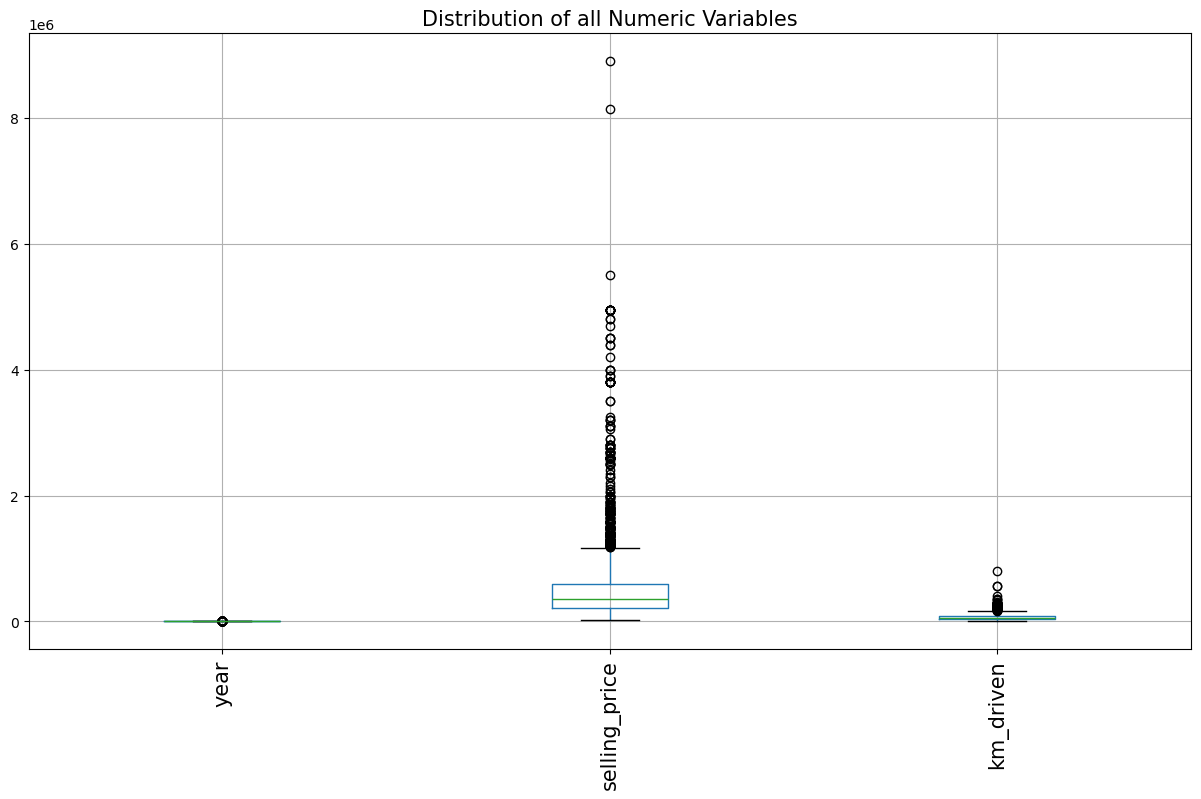

In [32]:
plt.figure(figsize = (15,8))


car_num.boxplot()

plt.title('Distribution of all Numeric Variables', fontsize = 15)

plt.xticks(rotation = 'vertical', fontsize = 15)

plt.show()

In [33]:
#It is not necessary to treat outliers here

ENCODING CATEGORICAL VARIABLES

In [34]:
df1 = df.copy()
df1.drop(['name', 'manufacturer'], axis=1, inplace=True)

In [35]:
df1.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [36]:
#df1 = pd.get_dummies(df1, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)
#df1.head()
df1 = pd.get_dummies(df1,  dtype='int64', drop_first=False)
df1.head()

,year,selling_price,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
1,2007,135000,50000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
2,2012,600000,100000,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
3,2017,250000,46000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,2014,450000,141000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0


MINMAX SCALER

In [37]:
scaler = MinMaxScaler()
num_vars = ['km_driven']
df1[num_vars] = scaler.fit_transform(df1[num_vars])


In [38]:
df1.head()

,year,selling_price,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,0.086783,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
1,2007,135000,0.061988,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
2,2012,600000,0.123976,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
3,2017,250000,0.057028,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,2014,450000,0.174807,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0


In [39]:
df1.shape

(4340, 18)

FEATURE SELECTION

In [40]:

variables = df1[['selling_price','km_driven','year']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,1.830031,selling_price
1,3.124075,km_driven
2,4.372046,year


In [41]:
# check for corrolation
df2 = df1[['selling_price','km_driven','year']]
df2.head()

,selling_price,km_driven,year
0,60000,0.086783,2007
1,135000,0.061988,2007
2,600000,0.123976,2012
3,250000,0.057028,2017
4,450000,0.174807,2014


In [42]:
# check for corrolation
df_corr = df2.corr()
df_corr

,selling_price,km_driven,year
selling_price,1.000000,-0.192289,0.413922
km_driven,-0.192289,1.000000,-0.419688
year,0.413922,-0.419688,1.000000


<Axes: >

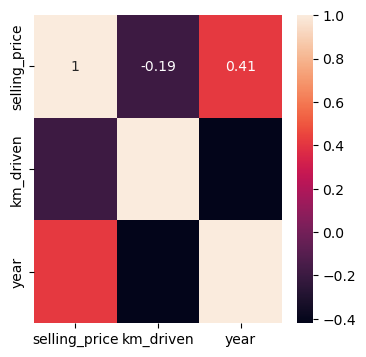

In [43]:
# correlation heat map
plt.figure(figsize=[4,4])
sns.heatmap(df2.corr(), annot=True)

In [44]:
# Correlated Features with target variable
print('\n--Correlated Features with target variable--\n')
print(abs(df2.corrwith(df2['selling_price'])).sort_values(ascending=False)[1:])


--Correlated Features with target variable--

year         0.413922
km_driven    0.192289
dtype: float64


In [45]:
#As we can see, selling_price and km_driven is highly correlated to year
#km_driven is negatively correlated and selling_price is positively correlated
#As VIF<5, we need to consider all columns for car price prediction

In [46]:
df1.head()

,year,selling_price,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,0.086783,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
1,2007,135000,0.061988,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
2,2012,600000,0.123976,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
3,2017,250000,0.057028,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,2014,450000,0.174807,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0


TRAIN TEST SPLIT

In [47]:
from sklearn.model_selection import train_test_split
X = df1.drop(['selling_price'], axis = 1)
y = df1['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 100)

In [48]:
X.head()

,year,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,0.086783,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
1,2007,0.061988,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
2,2012,0.123976,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
3,2017,0.057028,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,2014,0.174807,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0


In [49]:
X.describe()

,year,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
count,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000
mean,2013.090783,0.082091,0.009217,0.496083,0.000230,0.005300,0.489171,0.229032,0.747465,0.023502,0.103226,0.896774,0.652535,0.018664,0.254839,0.003917,0.070046
std,4.215344,0.057828,0.095571,0.500042,0.015179,0.072613,0.499940,0.420258,0.434516,0.151510,0.304289,0.304289,0.476220,0.135349,0.435821,0.062471,0.255254
min,1992.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,0.043391,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,0.074385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,0.111579,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,2020.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [51]:
y.describe()

count    4.340000e+03
mean     5.041273e+05
std      5.785487e+05
min      2.000000e+04
25%      2.087498e+05
50%      3.500000e+05
75%      6.000000e+05
max      8.900000e+06
Name: selling_price, dtype: float64

BUILDING MODEL

Linear Regression Model

In [52]:
# Model Building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(X_train,y_train)

# Model Summary
y_pred_lr = lr.predict(X_test)

R2_score = r2_score(y_test,y_pred_lr)*100
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",R2_score)
print("RMSE :",rmse)
print('MAE:', mean_absolute_error(y_test, y_pred_lr))
print('MSE:', mean_squared_error(y_test, y_pred_lr))

R_squared : 50.76182575304928
RMSE : 408273.51043120393
MAE: 225195.46604987746
MSE: 166687259319.8184


In [53]:
# Cross Validation Score
scores = cross_val_score(lr, X_train, y_train, cv = 5).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)


Cross validation score : 43.797804524984336

R2_Score - Cross Validation Score : 6.964021228064944


Random Forest Regressor Model

In [54]:
# Model Building
rf = RandomForestRegressor()

# Training Model
rf.fit(X_train,y_train)

# Model Summary
y_pred_rf = rf.predict(X_test)

R2_score = r2_score(y_test,y_pred_rf)*100
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",R2_score)
print("RMSE :",rmse)
print('MAE:', mean_absolute_error(y_test, y_pred_rf))
print('MSE:', mean_squared_error(y_test, y_pred_rf))

R_squared : 63.564228995256954
RMSE : 351207.850027365
MAE: 164070.2568039814
MSE: 123346953920.84412


In [55]:
# Cross Validation Score
scores = cross_val_score(rf, X_train, y_train, cv = 5).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)


Cross validation score : 59.149169233673646

R2_Score - Cross Validation Score : 4.415059761583308


GBT Regressor Model

In [56]:
# Model Building
gbt = GradientBoostingRegressor()

# Training Model
gbt.fit(X_train,y_train)

# Model Summary
y_pred_gbt = gbt.predict(X_test)

R2_score = r2_score(y_test,y_pred_gbt)*100
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R_squared :",R2_score)
print("RMSE :",rmse)
print('MAE:', mean_absolute_error(y_test, y_pred_gbt))
print('MSE:', mean_squared_error(y_test, y_pred_gbt))

R_squared : 71.89060716528944
RMSE : 308479.25614337577
MAE: 169613.22957835047
MSE: 95159451470.77045


In [57]:
# Cross Validation Score
scores = cross_val_score(gbt, X_train, y_train, cv = 5).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)


Cross validation score : 60.28054095571292

R2_Score - Cross Validation Score : 11.610066209576516


Decision Tree Regressor Model

In [59]:
#Building Model
DTR=DecisionTreeRegressor()

#Training Model
DTR.fit(X_train,y_train)

#Model Summary
pred=DTR.predict(X_test)

R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',mean_squared_error(y_test,pred))
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 28.170533397633402
mean_squared_error: 243166143129.1677
mean_absolute_error: 175634.55715816445
root_mean_squared_error: 493118.7921071024


In [62]:
# Cross Validation Score
scores = cross_val_score(DTR, X_train, y_train, cv = 5).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)


Cross validation score : 26.712575637173686

R2_Score - Cross Validation Score : 1.457957760459717


Bagging Regressor Model

In [63]:
#Building Model
BR=BaggingRegressor()

#Training Model
BR.fit(X_train,y_train)

#Model Summary
pred_br=BR.predict(X_test)

R2_score = r2_score(y_test,pred_br)*100
print('R2_score:',R2_score)
print('mean_squared_error:',mean_squared_error(y_test,pred_br))
print('mean_absolute_error:',mean_absolute_error(y_test,pred_br))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,pred_br)))

R2_score: 55.248203321461766
mean_squared_error: 151499409798.79562
mean_absolute_error: 170918.90255382712
root_mean_squared_error: 389229.2509547498


In [64]:
# Cross Validation Score
scores = cross_val_score(BR, X_train, y_train, cv = 5).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)


Cross validation score : 59.44103816668659

R2_Score - Cross Validation Score : -4.192834845224823


Extra Tree Regressor Model

In [66]:
#Building Model
etc = ExtraTreesRegressor()

#Training Model
etc.fit(X_train, y_train)

#Model Summary
y_pred = etc.predict(X_test)

R2_score = r2_score(y_test,y_pred)*100
print('R2_score:',R2_score)
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(y_test, y_pred)))

R2_score: 57.39806205548255
Mean absolute error : 159176.81306161382
Mean squared error : 144221437660.72653
Root Mean squared error : 379764.97687481204


In [67]:
# Cross Validation Score
scores = cross_val_score(etc, X_train, y_train, cv = 5).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)


Cross validation score : 59.30945711603608

R2_Score - Cross Validation Score : -1.9113950605535308


Final model Selection

Hyper Parameter Tunning

Random Forest Regressor Model

In [72]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter space
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the random search object
random_search = RandomizedSearchCV(RandomForestRegressor(), param_grid, n_iter=100, cv=5)

# Fit the random search object to the data
random_search.fit(X_train, y_train)

# Print the best parameters
print(random_search.best_params_)

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}


In [74]:
Final_mod1=RandomForestRegressor(n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=10)

Final_mod1.fit(X_train,y_train)

pred=Final_mod1.predict(X_test)

print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(y_test,pred))
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(y_test, pred)))

R2_Score: 70.98230888856068
mean_squared_error: 98234337018.5872
mean_absolute_error: 157774.7444979633
RMSE value: 313423.57444612746


GBT REGRESSOR MODEL

In [75]:
# Define the hyperparameter space
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(gbt, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best model's parameters
print(best_model.get_params())

{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [77]:
Final_mod2=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', max_depth=3, max_features=None, learning_rate=0.1,
                                min_samples_split=2, min_samples_leaf=1, n_estimators=500)

Final_mod2.fit(X_train,y_train)

y_pred=Final_mod2.predict(X_test)

print('R2_Score:',r2_score(y_test,y_pred)*100)
print('mean_squared_error:',mean_squared_error(y_test,y_pred))
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))
print("RMSE value:",np.sqrt(mean_squared_error(y_test, y_pred)))

R2_Score: 74.68117331455713
mean_squared_error: 85712476019.58586
mean_absolute_error: 162648.84916001937
RMSE value: 292766.93122616474


In [78]:
y_pred

array([ 715578.5579916 ,  383393.39194966,  852490.7125789 ,
        606402.68017686,  834215.62077752,  339223.89011904,
        451725.43950544,  426112.75360267,  762928.31214322,
        315309.70677011,  214600.12391015,  573624.39779009,
        441552.96534083,  745216.18951981,  504790.03970927,
        280424.87062957,  500781.52790302, 1664013.10430557,
        611545.63816585,  307685.3162745 ,  342107.37247184,
        360173.71976485,  538141.5063299 ,  284964.13218319,
        250881.84769908,   18432.64596691,  393845.94035058,
        418943.99447626,  251444.47400086,  887874.24840634,
        477297.6317319 ,  700032.1128371 ,  265625.47815973,
        580419.71607738,  709492.37608159,  179587.28114502,
        453187.58884273,  323294.77222041,  289750.17656135,
         77105.6228403 ,  380440.30488923,  306097.30149885,
        768574.88621915,  142315.97331612,  363551.58215076,
        381827.52867878,  486561.50017988,  260377.90191024,
        205326.05656371,

VISUALIZING PREDICTED VALUES IN COMPARISION TO ACTUAL VALUES

Text(0.5, 1.0, 'True value Vs Predicted values of Selling Price')

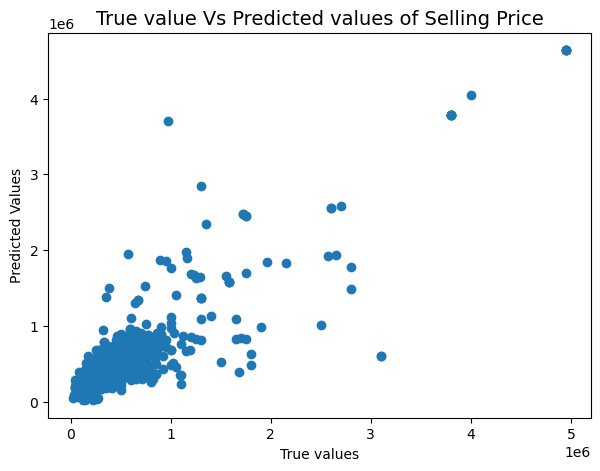

In [79]:
plt.figure(figsize=(7,5))
plt.scatter(x= y_test, y= y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted Values')
plt.title('True value Vs Predicted values of Selling Price', fontsize=14)

Checking for Normal Distribution

<Axes: xlabel='selling_price', ylabel='Density'>

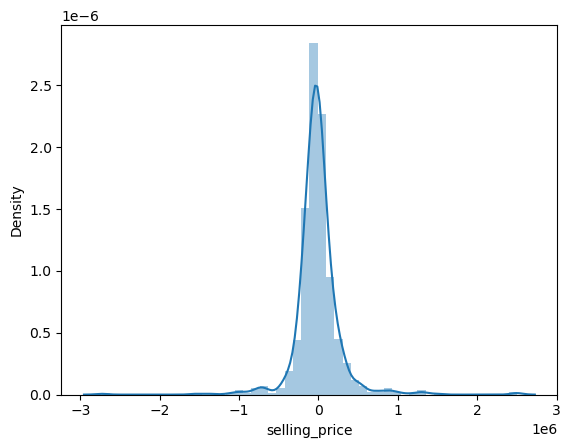

In [80]:
sns.distplot(y_test - y_pred)